In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from tqdm.notebook import tqdm
import ipywidgets


In [2]:
L = 1.

nx = 70
x = np.linspace(start=0.,stop=L,num=nx+1)
# print(x.size)
dx = L/nx
dx

nt = 50000

dt = 0.001
# t = np.arange(0,nt*dt,dt)

t = np.linspace(0.,nt*dt,nt+1)
t

k = 0.1

F = k*dt/dx**2

u = np.zeros(shape=(nx+1,nt+1))
# u

print('fourier number=',F )

# u[:,0] = np.sin(np.pi*x)
u[:,0] = np.sin(np.pi*x)

u[0,:] = 0
u[-1,:] = 0

for j in tqdm(range(1,nt+1)):
    for i in range(1,nx):
        u[i,j] = u[i,j-1] + F*(u[i+1,j-1] - 2*u[i,j-1] + u[i-1,j-1])

u[:,nt]

fourier number= 0.49000000000000005


  0%|          | 0/50000 [00:00<?, ?it/s]

array([0.00000000e+00, 1.63436845e-23, 3.26544549e-23, 4.88994636e-23,
       6.50459953e-23, 8.10615331e-23, 9.69138237e-23, 1.12570943e-22,
       1.28001359e-22, 1.43173997e-22, 1.58058302e-22, 1.72624299e-22,
       1.86842653e-22, 2.00684731e-22, 2.14122657e-22, 2.27129368e-22,
       2.39678671e-22, 2.51745293e-22, 2.63304934e-22, 2.74334313e-22,
       2.84811220e-22, 2.94714554e-22, 3.04024373e-22, 3.12721927e-22,
       3.20789701e-22, 3.28211447e-22, 3.34972219e-22, 3.41058401e-22,
       3.46457737e-22, 3.51159354e-22, 3.55153782e-22, 3.58432977e-22,
       3.60990337e-22, 3.62820710e-22, 3.63920410e-22, 3.64287223e-22,
       3.63920410e-22, 3.62820710e-22, 3.60990337e-22, 3.58432977e-22,
       3.55153782e-22, 3.51159354e-22, 3.46457737e-22, 3.41058401e-22,
       3.34972219e-22, 3.28211447e-22, 3.20789701e-22, 3.12721927e-22,
       3.04024373e-22, 2.94714554e-22, 2.84811220e-22, 2.74334313e-22,
       2.63304934e-22, 2.51745293e-22, 2.39678671e-22, 2.27129368e-22,
      

  0%|          | 0/50001 [00:00<?, ?it/s]

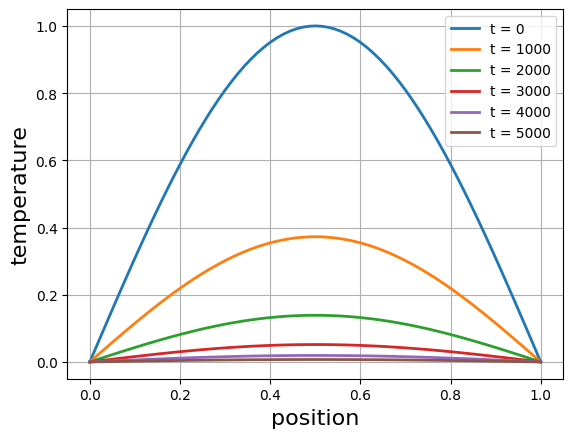

In [3]:
for j in tqdm(range(nt+1)):
    if j%1000 == 0 and j<6000:
        plt.plot(x,u[:,j],ls = '-',lw = 2,label= f't = {j}')
    

plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()
plt.legend()
plt.show()

## Backward euler

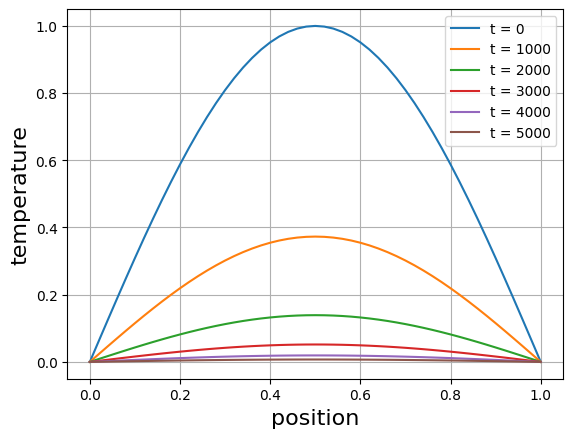

In [4]:
L = 1.0

nx = 50
x = np.linspace(start=0.,stop=L,num=nx+1)
# print(x.size)
dx = L/nx
dx

nt = 5000

dt = 0.001
# t = np.arange(0,nt*dt,dt)

t = np.linspace(0.,nt*dt,nt+1)
t

k = 0.1

F = k*dt/dx**2
u = np.zeros(shape=(nx+1))

u_0 = np.sin(np.pi*x)

A = np.zeros((nx+1,nx+1))
b = np.zeros(nx+1)

for i in range(1,nx):
    A[i,i] = 1+2*F
    A[i,i-1] = -1*F
    A[i,i+1] = -1*F
A[0,0] = 1
A[nx,nx] =1

for i in range(nt+1):
    b = u_0
    b[0] = b[-1] = 0
    u_0 = np.linalg.solve(A,b)
    if i%1000 == 0:
        plt.plot(x,u_0,label = f't = {i}')
plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()
plt.legend()
plt.show()

## forward euler

  0%|          | 0/61 [00:00<?, ?it/s]

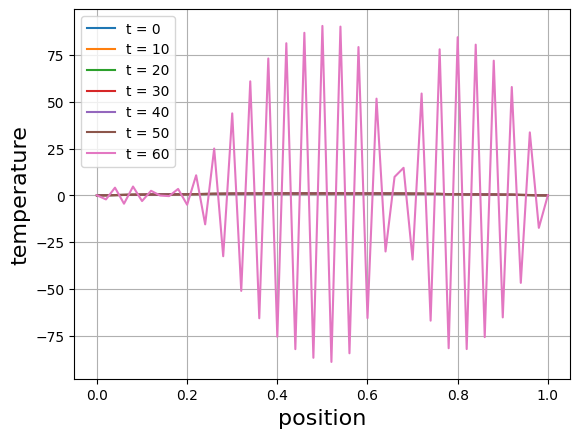

In [5]:
nt = 60

u_01 = np.sin(np.pi*x)
for i in tqdm(range(nt+1)):
    u_01[0] = u_01[-1] = 0
    u_01 = np.matmul(A,u_01)
    if i%10 ==0:
        plt.plot(x,u_01,label = f't = {i}')

plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()
plt.legend()
plt.show()

## 2D Heat 

In [6]:
# Localised HotSpot

Lx = 1.0
Ly = 1.2
nx =50
ny =50
x = np.linspace(0,Lx,num=nx+1)
y = np.linspace(0,Ly,num=ny+1)

dx= L/nx
dy = L/ny
nt = 1000


dt = 0.001
t = np.linspace(0.0,nt*dt,nt+1)

k = 0.1
F1 = k*dt/dx**2
F2 = k*dt/dy**2

u = np.zeros(shape=(nx+1,ny+1,nt+1))

# print(F1,F2)

X,Y = np.meshgrid(x,y,indexing='ij')

T0 =300
A = 100
sigma = 0.3*L

u[:,:,0] = T0 +  A*np.exp(-((X - L/2)**2 + (Y - L/2)**2)/(2* sigma**2))
u[:,:,0]


array([[306.2176524 , 307.08178321, 308.01455349, ..., 302.35041617,
        301.96899989, 301.63895538],
       [306.9329215 , 307.89646057, 308.9365353 , ..., 302.62080441,
        302.19551058, 301.82749827],
       [307.69619262, 308.7658113 , 309.92039172, ..., 302.90933852,
        302.43722251, 302.02869435],
       ...,
       [307.69619262, 308.7658113 , 309.92039172, ..., 302.90933852,
        302.43722251, 302.02869435],
       [306.9329215 , 307.89646057, 308.9365353 , ..., 302.62080441,
        302.19551058, 301.82749827],
       [306.2176524 , 307.08178321, 308.01455349, ..., 302.35041617,
        301.96899989, 301.63895538]], shape=(51, 51))

In [7]:
u[0,:,:] = u[-1,:,:] = u[:,0,:] = u[:,-1,:] = T0
print(u[:,:,1])

[[300. 300. 300. ... 300. 300. 300.]
 [300.   0.   0. ...   0.   0. 300.]
 [300.   0.   0. ...   0.   0. 300.]
 ...
 [300.   0.   0. ...   0.   0. 300.]
 [300.   0.   0. ...   0.   0. 300.]
 [300. 300. 300. ... 300. 300. 300.]]


In [8]:
for k in tqdm(range(1,nt+1)):
    for i in range(1,nx):
        for j in range(1,ny):
            u[i,j,k] = u[i,j,k-1] + F1*(u[i+1,j,k-1] - 2*u[i,j,k-1] + u[i-1,j,k-1])+ F2*(u[i,j+1,k-1] - 2*u[i,j,k-1] + u[i,j-1,k-1])


  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:

u[:,:,500]

array([[300.        , 300.        , 300.        , ..., 300.        ,
        300.        , 300.        ],
       [300.        , 300.14988014, 300.29900771, ..., 300.24356295,
        300.12193713, 300.        ],
       [300.        , 300.29915603, 300.59681025, ..., 300.48614408,
        300.24338267, 300.        ],
       ...,
       [300.        , 300.29915603, 300.59681025, ..., 300.48614408,
        300.24338267, 300.        ],
       [300.        , 300.14988014, 300.29900771, ..., 300.24356295,
        300.12193713, 300.        ],
       [300.        , 300.        , 300.        , ..., 300.        ,
        300.        , 300.        ]], shape=(51, 51))

<Axes: >

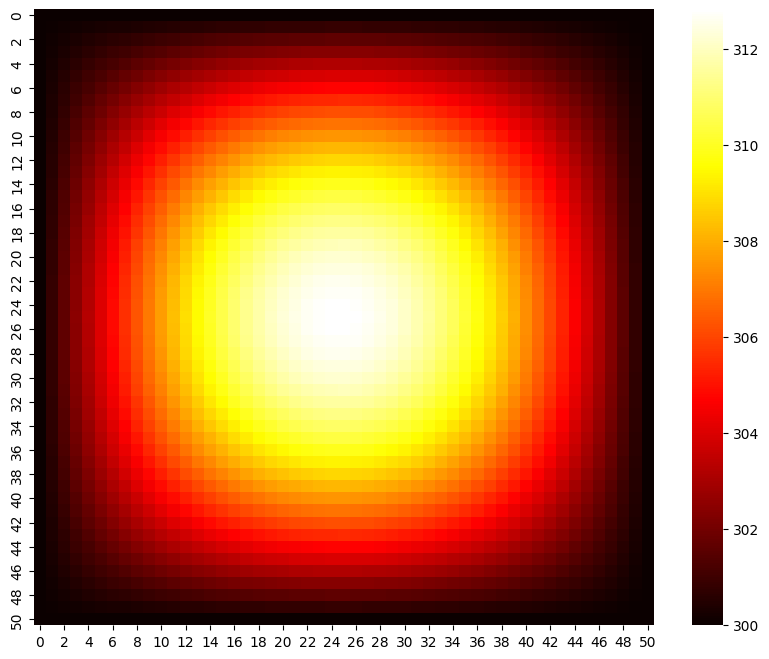

In [10]:
import seaborn as sns
fig = plt.figure(figsize=(10,8))
sns.heatmap(u[:,:,1000],cmap=plt.cm.hot)

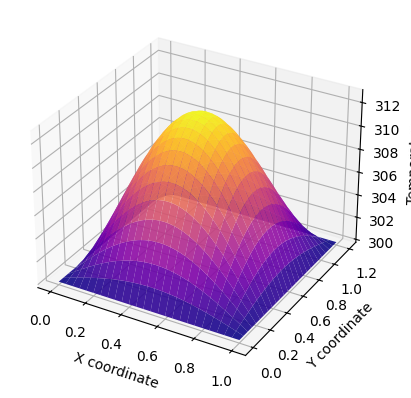

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i = u.shape[2] -1
surf = ax.plot_surface(X,Y,u[:,:,i],cmap = 'plasma' , alpha = 0.9)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Temperature')
plt.show()

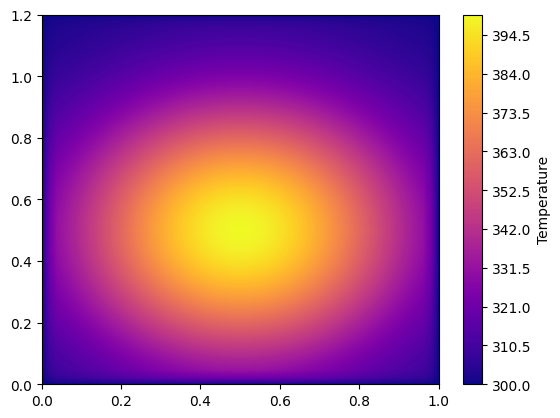

In [12]:
plt.contourf(X,Y,u[:,:,1],levels = 200,cmap = 'plasma')
plt.colorbar(label = 'Temperature')
plt.show()

> Made using Chatgpt

In [13]:

#Chat gpt + copilot 

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# use existing x, y, u, nt arrays; avoid overwriting other figures/axes
fig_anim, ax_anim = plt.subplots(figsize=(6,5))

vmin, vmax = u.min(), u.max()
im = ax_anim.imshow(u[:, :, 0], cmap='jet', origin='lower',
                    extent=[x.min(), x.max(), y.min(), y.max()],
                    vmin=vmin, vmax=vmax, animated=True)
cbar = fig_anim.colorbar(im, ax=ax_anim, label='Temperature')
ax_anim.set_xlabel('x')
ax_anim.set_ylabel('y')
ax_anim.set_title("Temperature at t = 0")

def update(frame):
    im.set_array(u[:, :, frame])
    ax_anim.set_title(f"Temperature at t = {frame} (step)")
    return [im]

frames = range(0, nt+1, 5)  # adjust step if you want more/less frames
ani_anim = FuncAnimation(fig_anim, update, frames=frames, interval=100, blit=True)

# return HTML-safe animation for Jupyter
anim = HTML(ani_anim.to_jshtml())
plt.close(fig_anim)   # prevent static figure output
anim

## Matrix Approach

In [14]:
# Localised HotSpot

L = 1.0
nx =50
ny =50
x = np.linspace(0,L,num=nx+1)
y = np.linspace(0,L,num=ny+1)

dx= L/nx
dy = L/ny
nt = 1000


dt = 0.001
t = np.linspace(0.0,nt*dt,nt+1)

k = 0.1
F1 = k*dt/dx**2
F2 = k*dt/dy**2
# print(F1,F2)

X,Y = np.meshgrid(x,y)

T0 =300
A = 100
sigma = 0.3*L

# u[:,:,0] = T0 +  A*np.exp(-((X - L/2)**2 + (Y - L/2)**2)/(2* sigma**2))
# u[:,:,0]
u_0 = np.zeros(shape = (nx+1,ny+1))
u_0 = T0 +  A*np.exp(-((X - L/2)**2 + (Y - L/2)**2)/(2* sigma**2))
u_0[0,:] = u_0[-1,:] = u_0[:,0] = u_0[:,-1] = T0
u_0

A = np.zeros((nx+1,nx+1))
b = np.zeros_like(u_0)
for i in range(1,nx):
    for j in range(1,nx):
        A[i,j] = 1+2*F1+2*F2
        A[i+1,j] = -F1
        A[i-1,j] = -F1
        A[i,j+1] = -F2
        A[i,j-1] = -F2

A[0,0] = A[-1,0] = A[-1,-1] = A[0,-1] = 1
# for i in tqdm(range(nt+1)):
#     b = u_0
#     b[0,:] = b[-1,:] = b[:,0] = b[:,-1] = T0
#     u_0 = np.matmul(np.linalg.inv(A),b)

    

In [15]:
# u_final - u[:,:,1000]
# u_final